In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [0]:
patients = Table.read_table('https://raw.githubusercontent.com/abby621/cs1070_materials/master/fl2019/demos/breast-cancer.csv')

# Using sklearn to implement k-Nearest Neighbors
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [49]:
# first we need to create our training/testing split
def split_dataset(table,class_column,irrelevant_columns=[], split=.5):
  # shuffle the original dataset
  shuffled = table.sample(with_replacement=False)

  # make the first split*num_rows training data and the second testing data
  trainrows = shuffled.take(range(int(split*table.num_rows)))
  testrows = shuffled.take(range(int(split*table.num_rows), table.num_rows))

  # get the labels for both the training and testing datasets
  train_labels = trainrows[class_column]
  test_labels = testrows[class_column]

  # create empty arrays that only contain the relevant features for the classifier
  # (e.g., not the class column, or any other columns you pass in as being irrelevant -- like an ID column)
  train_set = np.zeros((trainrows.num_rows, trainrows.num_columns - 1 - len(irrelevant_columns)))
  test_set = np.zeros((testrows.num_rows, testrows.num_columns - 1 - len(irrelevant_columns)))

  # loop over every column and check if it's the class column or in irrelevant columns
  for column_idx in range(trainrows.num_columns):
    column_name = trainrows.column_labels[column_idx]
    if column_name != class_column and column_name not in irrelevant_columns:
      # if the column should be included, loop over all rows in both trainrows 
      # and testrows and update the values in the output datasets
      for row_idx in range(trainrows.num_rows):
        train_set[row_idx,column_idx] = trainrows[column_name][row_idx]
      for row_idx in range(testrows.num_rows):
        test_set[row_idx,column_idx] = testrows.column(column_name).item(row_idx)

  # send back the training set, training labels, testing set and testing labels
  return train_set, train_labels, test_set, test_labels

train_set, train_labels, test_set, test_labels = split_dataset(patients,'Class')
print('train labels: ', train_labels)
print('test labels: ', test_labels)

train labels:  [1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0
 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0]
test labels:  [0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:234: FutureWarning: column_labels is deprecated; use labels
  warnings.warn("column_labels is deprecated; use labels", FutureWarning)


(array([227., 115.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

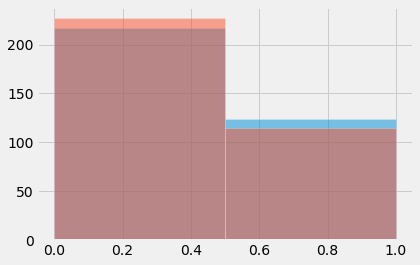

In [32]:
# we can look and see that by randomly splitting the dataset, we ended up with similar statistics for the training and testing sets
plt.hist(train_labels,bins=[0,.5,1],alpha=0.5)
plt.hist(test_labels,bins=[0,.5,1],alpha=0.5)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# k is the number of neighbors we will consider in our classifier
k = 1

# create our classifier and pass our training data into it
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(train_set,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [56]:
knn.predict(test_set)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [59]:
(knn.predict(test_set)==test_labels).sum() / len(test_labels)

0.5847953216374269

In [57]:
knn.score(test_set,test_labels)

0.5847953216374269

Your homework for this week:

The function split_dataset takes in a parameter split. By default this is set to 0.5 (or, it splits the dataset to have 50% in the training dataset and 50% in the testing dataset). Explore the impact on your testing accuracy for different values of split between 0.5 and 0.9.

Additionally explore different numbers of neighbors (values of k).

Make a write up (1 - 2 paragraphs) of the impact changing these different values has on the testing accuracy of your knn classifier. Post this write up to your slack channel.

You may discuss this assignment with your peers on slack, but your write up should be done on your own.